## Clustering - Tarea Individual

### Entrega 31/11 a correo marcelo.medel.v@gmail.com.

1 .- (20%) Del código de K-means entregado como ejemplo a continuación, desarrolle: 

* **Defina con un nombre cada uno de los segmentos (clusters) encontrados en la data.**  
1.-Clientes ocacionales: Compran pocas veces, recencia alta, montos bajos  
2.-Clientes en etapa de prueba: Han comprado pocas veces, recencia baja, montos bajos  
3.-Clientes Fieles: Compran hartas veces, recencia baja, montos altos

* **Ejecute el modelo con k=4, ¿cómo se llamaría el nuevo segmento definido?  
En este caso los segmentos quedarían así:**  
1.-Clientes ocacionales: Frecuencia baja, recencia alta, montos bajos  
2.-Clientes en etapa de prueba: Frecuencia baja, recencia baja, montos bajos  
3.-Clientes Fieles: Frecuencia intermedia, recencia baja, montos altos  
3.-Clientes Fan: Frecuencia alta, recencia baja, montos mayores  

* **¿Cómo y para qué se utilizan los métodos de Silhouette Score y Calinski Harabrasz?**  
**Silhouette Score:** Se utiliza para medir la distancia de separación entre clusteres, muestra la proximidad de cada punto respecto a su cluster más cercano. Este posee valores entre -1 y 1 , en donde mientras el valor sea más cercano a 1 significa que el cluster a sido bien asignado y mientras más cercano a -1 significa que el registro no a sido asignado correctamente al cluster. Esto se utiliza con un gráfico donde Y es el número de cluster y la X el Score de cada registro, en donde se análiza la distribución con respecto al Score promedio.  
**Calinski Harabrasz:** Es la división entre la suma de disperción entre clusters con la suma de disperción dentro del cluster. Se utiliza para cuntificar desempeño de clustering, en donde, mientras más alto sea el indicador indica que la segmentación es mejor.

**2 .- (40%) Implemente el código para Hierarchical Agglomerative Clustering (**HAC**), puede reutilizar el código del ejemplo de kaggle.** 

* Ejemplo: https://www.kaggle.com/hellbuoy/online-retail-k-means-hierarchical-clustering/notebook

El método queda implementado al final del notebook.

* **¿Cuáles son las principales diferencias entre Single, Complete y Average Linkage en **HAC**?**
La diferencia es en como se mide la distancia entre 2 clusters. Para Single la distancia se mide como la distancia más corta entre los puntos de cada cluster; Complete, se mide como la distancia más larga entre los puntos de cada cluster y Average se mide como la distancia promedio entre los puntos de los clusteres.

* **¿Qué tan diferentes son los resultados entre ambos métodos K-means vs HAC?**
    * ¿Los clientes quedan categorizados en el mismo cluster u en otro? 
    Los clusters presentan diferencias notorias, en donde cambian los rangos máximos y minimo para todos los clusters,el rango dentro del cluster y los valores outliers también se modifican. 
    * ¿Hay diferencias en el tiempo de ejecución?
    Sí, medí el tiempo de ejecución del modelo con librería time midiendo diferencias en los tiempos en donde encontré que el método HAC se demoró 85,5 veces más que el método K-means en ejecutar el modelo.  
     Tiempos de ejecución:  
     K-means: 0.00810933113098144 Segundos  
     HAC: 0.701447486877441 Segundos  
     tiempo ejecución HAC/ tiempo ejecución K-means = 86.5

**3 .- (40%) Implemente la detección de outliers en el dataframe `rfm` con DBSCAN, siguiendo los ejemplos de los links siguientes.** 
* Ejemplo: http://exponentis.es/ejemplo-de-uso-de-dbscan-en-python-para-deteccion-de-outliers
* Ejemplo: https://www.datatechnotes.com/2020/04/anomaly-detection-with-dbscan-in-python.html
* ¿Qué tan diferentes son los resultados respecto a la detección de outliers utilizando ***interquartile range***?

Método implementado más abajo. La cantidad de valores son distintos, con DBSCAN se encontraron 74 outliers mientras que con rango intercuartilico se encontraron 20, por lo que con el método DBSCAN se encontraron más de 3 veces la cantidad de outliers, siendo este un método más severo en la busqueda de outliers.

# Ejemplo de RFM y K-means

## Data Preprocessing

* Cargamos los datos
* Se eliminan valores nulos
* Se cambia el tipo de datos de customerID
* Se crean nuevos atributos de RFM. 
    * https://medium.com/@hhuseyincosgun/customer-segmentation-rfm-analysis-recency-frequency-monetary-5b29d5d45e35
* Detección y filtraje de outliers para los nuevos atributos creados
* Se realiza un escalamiento de los datos. 


In [147]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import datetime as dt
import missingno as msno
import time

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.decomposition import PCA
import sklearn.neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [111]:
retail = pd.read_csv('OnlineRetail.csv', sep=",", encoding="ISO-8859-1", header=0)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [112]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<Axes: >

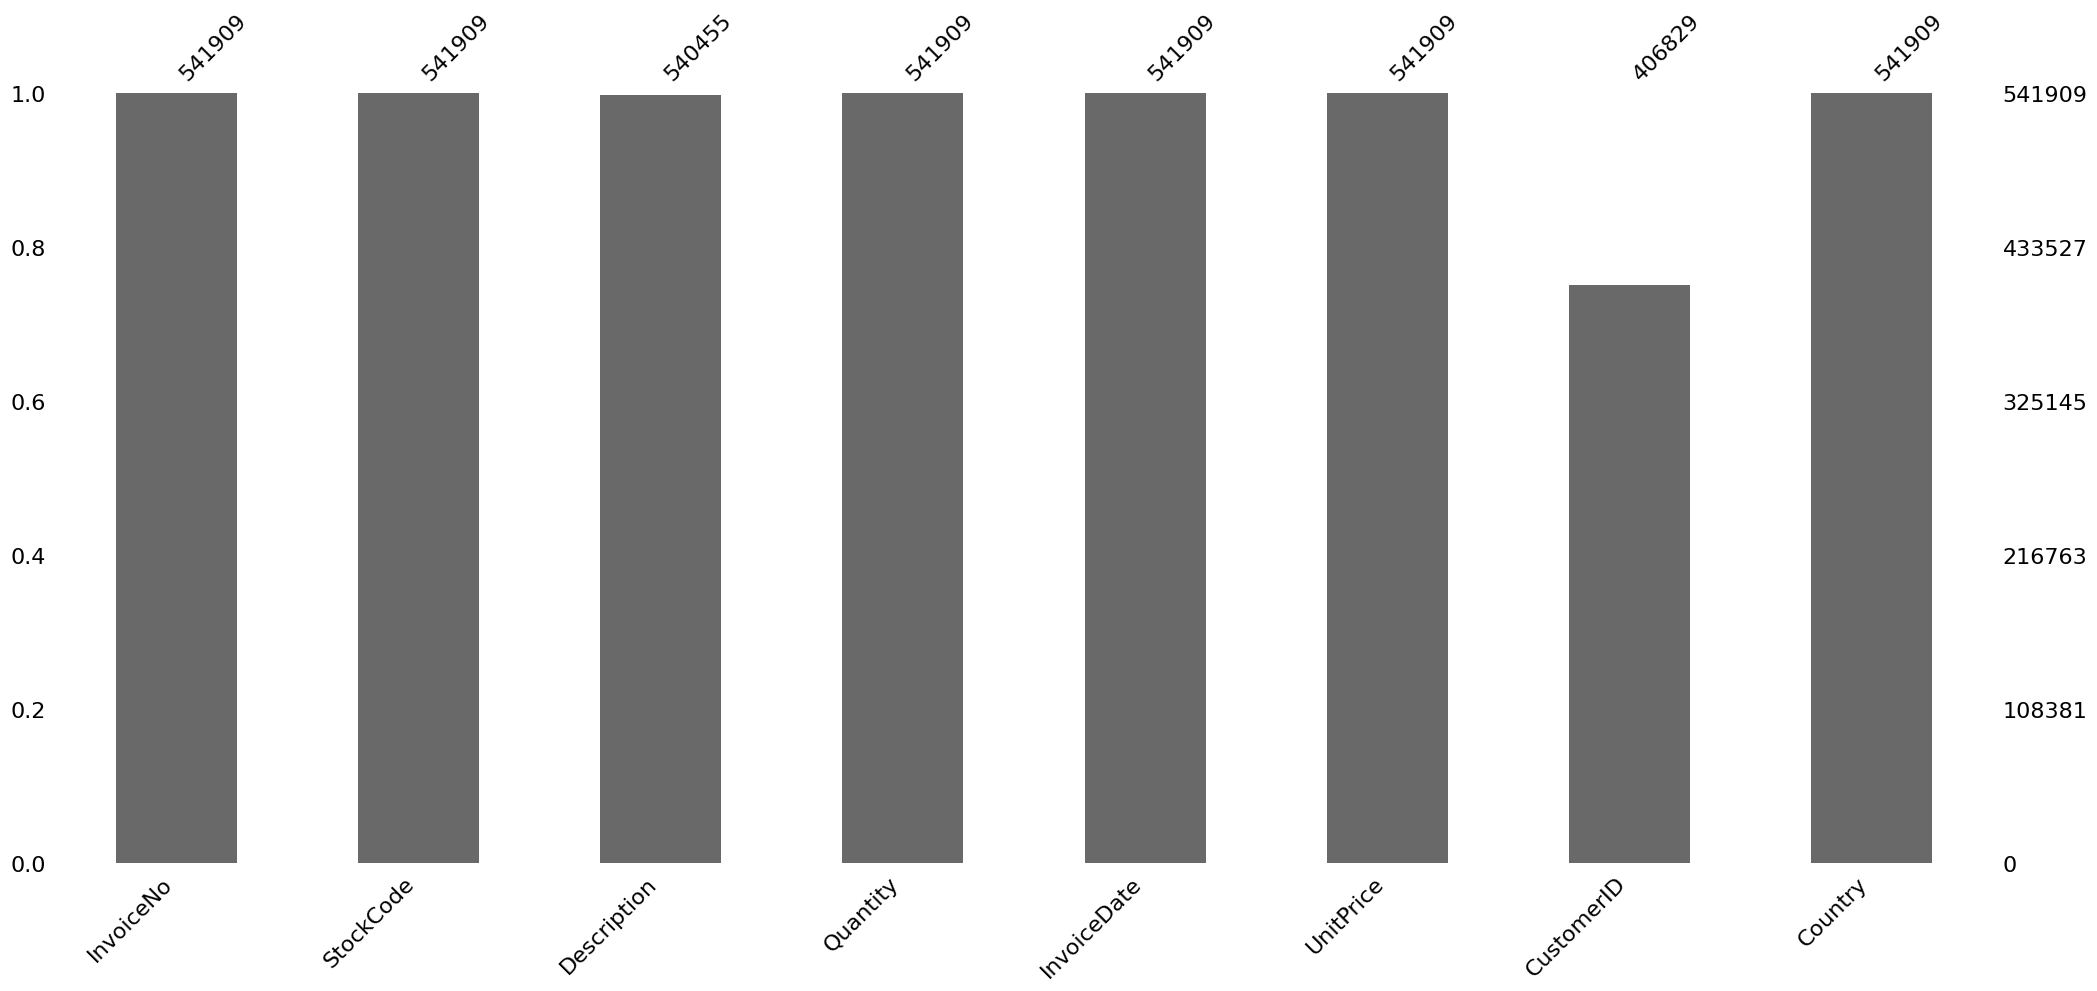

In [113]:
msno.bar(retail)

In [114]:
# Droping rows having missing values
retail = retail.dropna()

# Changing the datatype of Customer Id as per Business understanding
retail['CustomerID'] = retail['CustomerID'].astype(int).astype(str)

retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


In [151]:
## To do a RFM model we have to create 3 columns recency, frequency and monetary
## monetary = Quantity * UnitPrice

retail.columns = retail.columns.str.lower()
retail['monetary'] = retail['quantity'] * retail['unitprice']
retail['invoicedate'] = pd.to_datetime(retail['invoicedate'], format='%Y-%m-%d %H:%M:%S')
retail['diff_days'] = (retail['invoicedate'].max() - retail['invoicedate']).dt.days

rfm = retail.groupby('customerid').agg({'diff_days': 'min', 'invoiceno':pd.Series.nunique, 'monetary': 'sum' }).reset_index()

rfm.columns = ['customerid', 'recency', 'frequency', 'monetary']

rfm.head()

,customerid,recency,frequency,monetary
0,12346,325,2,0.00
1,12347,1,7,4310.00
2,12348,74,4,1797.24
3,12349,18,1,1757.55
4,12350,309,1,334.40


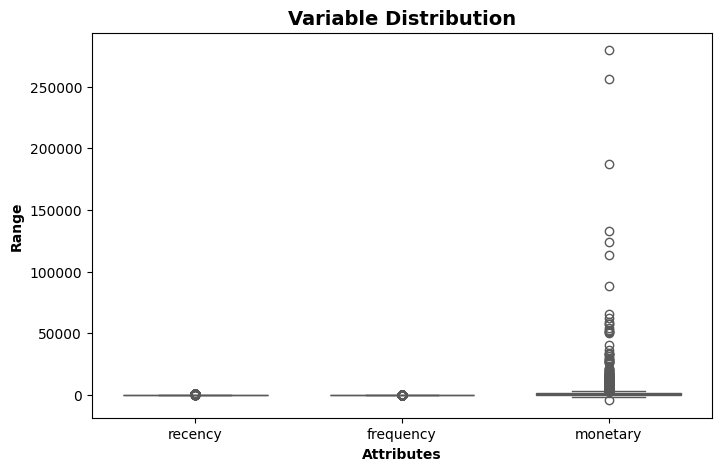

In [116]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['recency','frequency','monetary']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.show()

outliers eliminados: 20


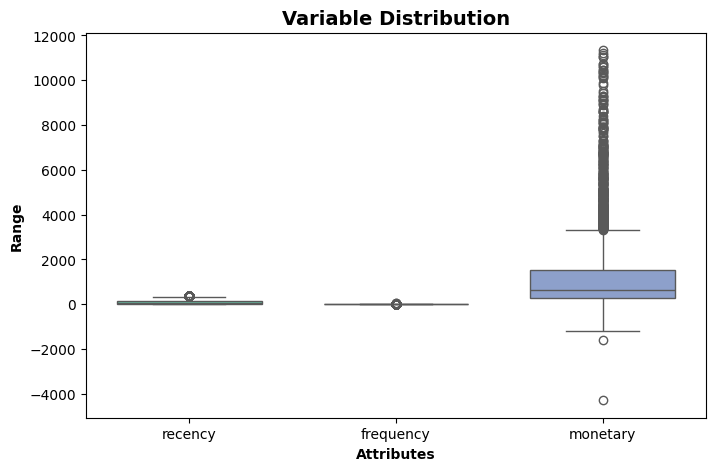

In [154]:
### Outlier Treatment using Interquantile range

outliers_eliminados = 0

def get_iqr(df,col):
    q1 = df[col].quantile(0.05)
    q3 = df[col].quantile(0.95)
    iqr = q3-q1
    return q1,q3,iqr

# Removing (statistical) outliers for Amount
col = 'monetary'
q1, q3, iqr = get_iqr(rfm,col)
rfm_largo0 = rfm.shape[0]
rfm = rfm[(rfm[col] >= q1 - 1.5*iqr) & (rfm[col] <= q3 + 1.5*iqr)]
rfm_largo1 = rfm.shape[0]

outliers_eliminados += rfm_largo0 - rfm_largo1


# Removing (statistical) outliers for Recency
col = 'recency'
q1, q3, iqr = get_iqr(rfm,col)
rfm_largo0 = rfm.shape[0]
rfm = rfm[(rfm[col] >= q1 - 1.5*iqr) & (rfm[col] <= q1 + 1.5*iqr)]
rfm_largo1 = rfm.shape[0]

outliers_eliminados += rfm_largo0 - rfm_largo1


# Removing (statistical) outliers for Frequency
col = 'frequency'
q1, q3, iqr = get_iqr(rfm,col)
rfm_largo1 = rfm.shape[0]
rfm = rfm[(rfm[col] >= q1 - 1.5*iqr) & (rfm[col] <= q3 + 1.5*iqr)]
rfm_largo1 = rfm.shape[0]

outliers_eliminados += rfm_largo0 - rfm_largo1

print('outliers eliminados:',outliers_eliminados)

## ¿cuántos outliers removí?

attributes = ['recency','frequency','monetary']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.show()

In [118]:
## Solo dejaremos valores positivos de monetary
rfm = rfm.query('monetary > 0').reset_index(drop=True)

In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(rfm[['recency', 'frequency', 'monetary']])
scaled.shape

scaled

rfm_scaled = pd.DataFrame(scaled)
rfm_scaled.columns = ['recency', 'frequency', 'monetary']
rfm_scaled.head()

,recency,frequency,monetary
0,-0.903887,0.575435,1.749771
1,-0.168771,-0.063870,0.297362
2,-0.732696,-0.703175,0.274420
3,2.197698,-0.703175,-0.548179
4,-0.561504,1.427842,0.151801


## KMeans

#### Se aplican distintos k con KMeans, se calculan la inercia, distorsión, Silhouette score y Calinski Harabrasz score para cada k.
### 

* https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [120]:
# Calinski Harabasz
from sklearn.metrics import calinski_harabasz_score as chs

# Silhouette score 
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

K = range(2,10)
distortions = []
inertias = []
sil_score = []
chs_score = []

for k in K:
    # intialise kmeans
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(rfm_scaled)
    
    distortions.append(sum(np.min(cdist(rfm_scaled, kmeans.cluster_centers_,
                                    'euclidean'), axis=1)) / rfm_scaled.shape[0])
    inertias.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
    sil_score.append(silhouette_score(rfm_scaled, cluster_labels))
    chs_score.append(chs(rfm_scaled,cluster_labels))


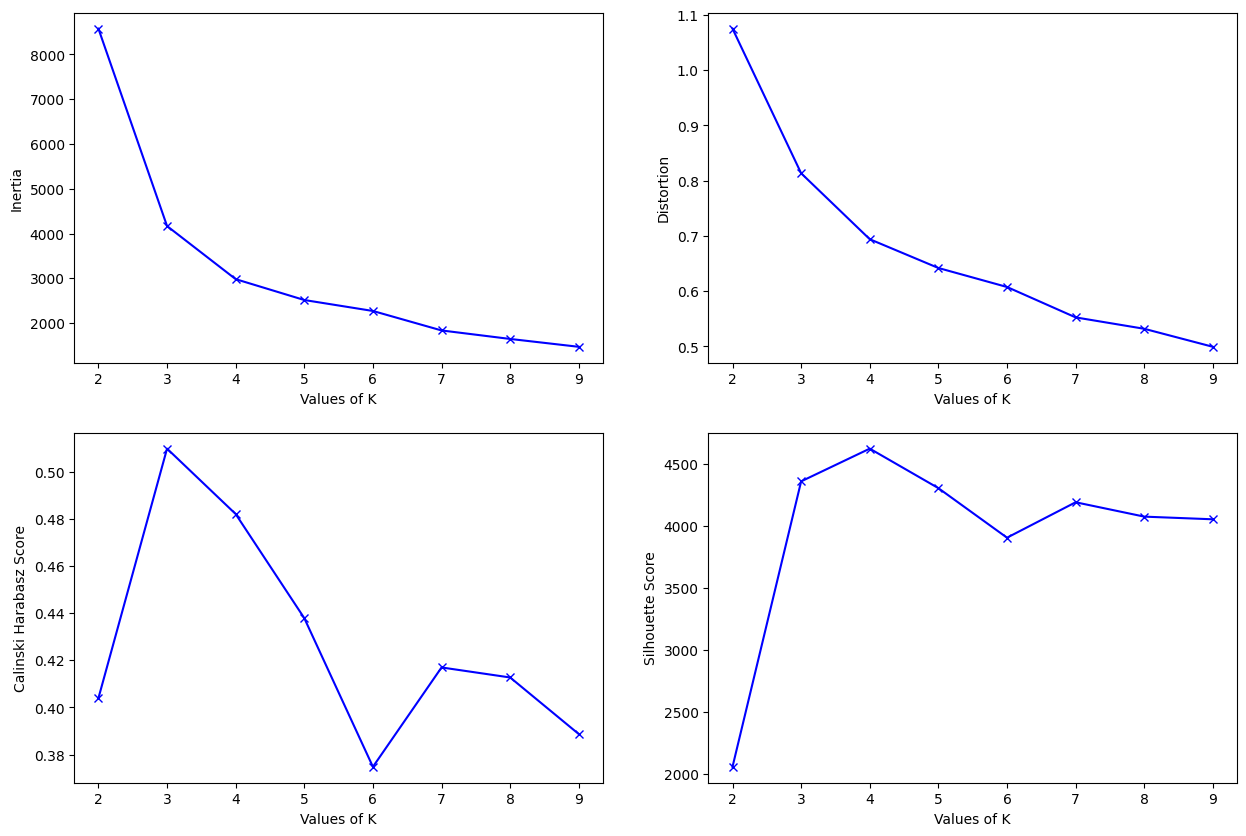

In [121]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
## Plot results

ax[0,0].plot(K, inertias, 'bx-')
ax[0,0].set_xlabel('Values of K')
ax[0,0].set_ylabel('Inertia')

ax[0,1].plot(K, distortions, 'bx-')
ax[0,1].set_xlabel('Values of K')
ax[0,1].set_ylabel('Distortion')

ax[1,0].plot(K, sil_score, 'bx-')
ax[1,0].set_xlabel('Values of K')
ax[1,0].set_ylabel('Calinski Harabasz Score')

ax[1,1].plot(K, chs_score, 'bx-')
ax[1,1].set_xlabel('Values of K')
ax[1,1].set_ylabel('Silhouette Score')

plt.show()

In [122]:
inicio = time.time()
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_scaled)
fin = time.time()
print (fin-inicio)

0.008109331130981445


In [123]:
# assign the label
rfm['cluster_id'] = kmeans.labels_
rfm.head()

,customerid,recency,frequency,monetary,cluster_id
0,12347,1,7,4310.00,1
1,12348,74,4,1797.24,2
2,12349,18,1,1757.55,2
3,12350,309,1,334.40,0
4,12352,35,11,1545.41,2


### Graficamos los clusters utilizando 2 dimensiones.

* https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python

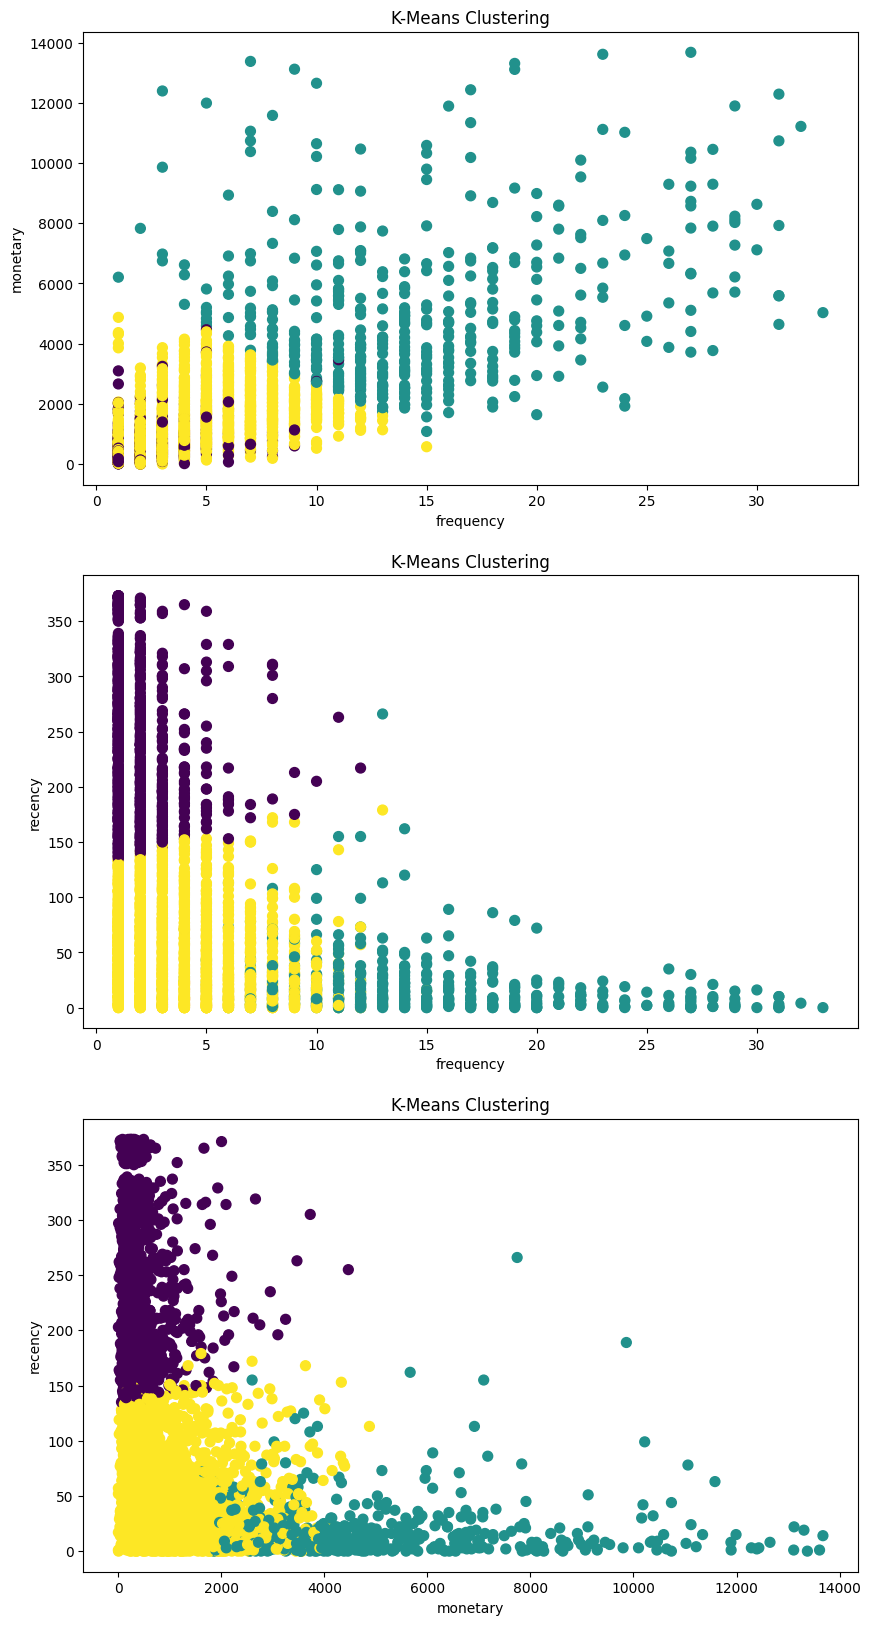

In [124]:
#Plot the clusters obtained using k means

fig, ax = plt.subplots(3,1,figsize=(10,20))
ax[0].scatter(rfm['frequency'],rfm['monetary'],c=rfm['cluster_id'],s=50)
ax[0].set_title('K-Means Clustering')
ax[0].set_xlabel('frequency')
ax[0].set_ylabel('monetary')
#plt.colorbar(scatter)

#Plot the clusters obtained using k means

ax[1].scatter(rfm['frequency'],rfm['recency'],c=rfm['cluster_id'],s=50)
ax[1].set_title('K-Means Clustering')
ax[1].set_xlabel('frequency')
ax[1].set_ylabel('recency')

#Plot the clusters obtained using k means
ax[2].scatter(rfm['monetary'],rfm['recency'],c=rfm['cluster_id'],s=50)
ax[2].set_title('K-Means Clustering')
ax[2].set_xlabel('monetary')
ax[2].set_ylabel('recency')

plt.show()

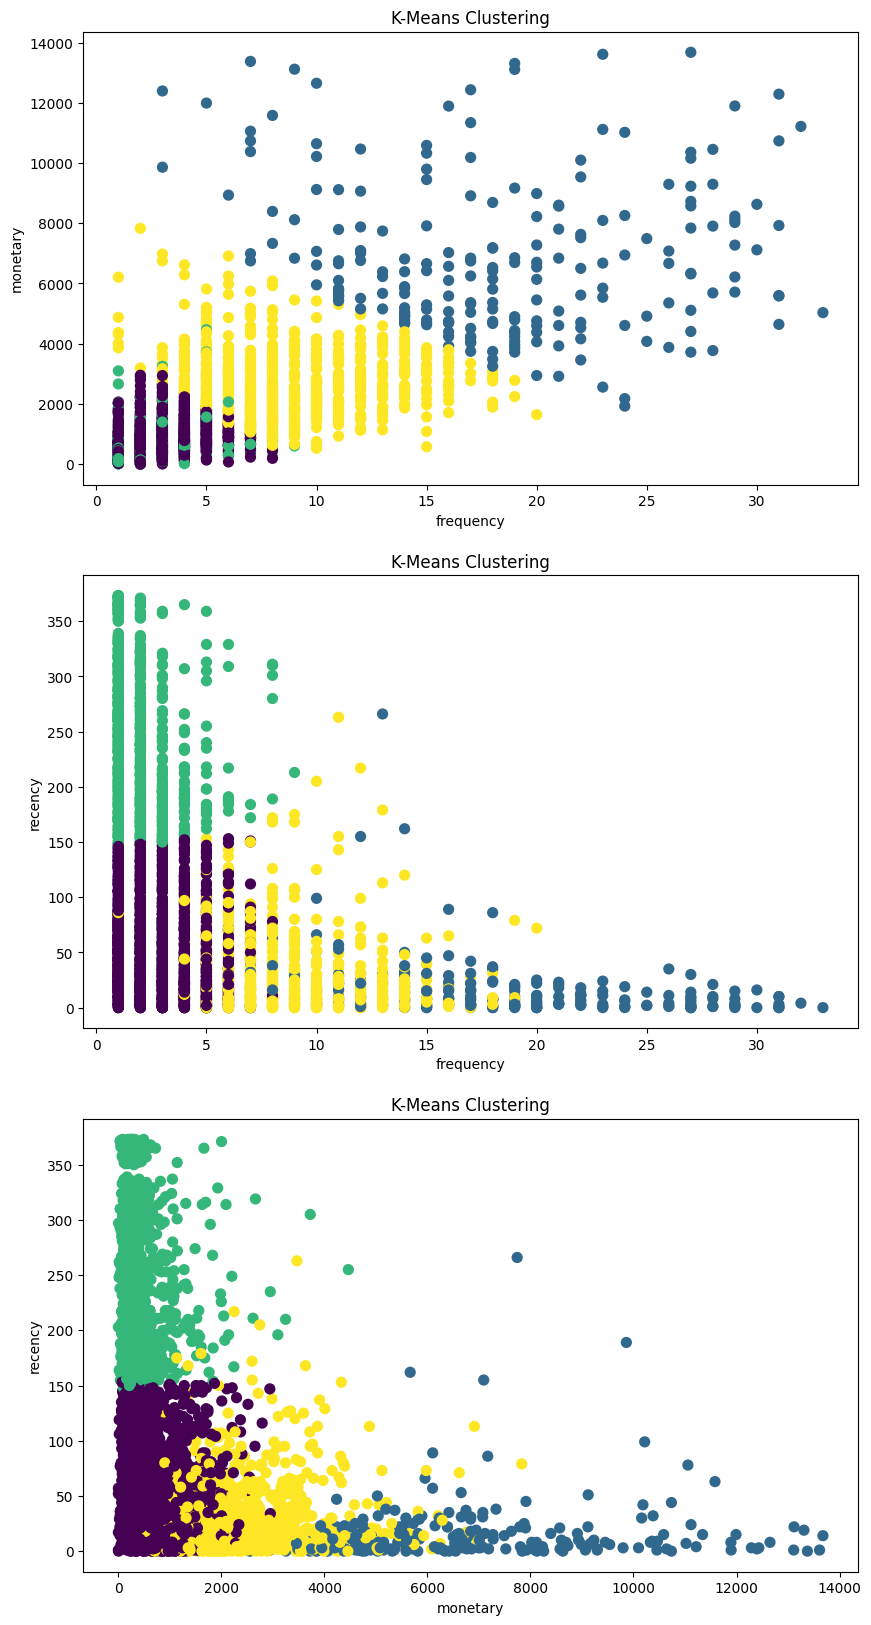

In [125]:
#Utilizamos Kmeans con 4 clusters
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_scaled)
# assign the label
rfm['cluster_id'] = kmeans.labels_

#Plot the clusters obtained using k means

fig, ax = plt.subplots(3,1,figsize=(10,20))
ax[0].scatter(rfm['frequency'],rfm['monetary'],c=rfm['cluster_id'],s=50)
ax[0].set_title('K-Means Clustering')
ax[0].set_xlabel('frequency')
ax[0].set_ylabel('monetary')
#plt.colorbar(scatter)

#Plot the clusters obtained using k means

ax[1].scatter(rfm['frequency'],rfm['recency'],c=rfm['cluster_id'],s=50)
ax[1].set_title('K-Means Clustering')
ax[1].set_xlabel('frequency')
ax[1].set_ylabel('recency')

#Plot the clusters obtained using k means
ax[2].scatter(rfm['monetary'],rfm['recency'],c=rfm['cluster_id'],s=50)
ax[2].set_title('K-Means Clustering')
ax[2].set_xlabel('monetary')
ax[2].set_ylabel('recency')

plt.show()

### Otra forma de visualizar lo mismo

<Axes: xlabel='cluster_id', ylabel='frequency'>

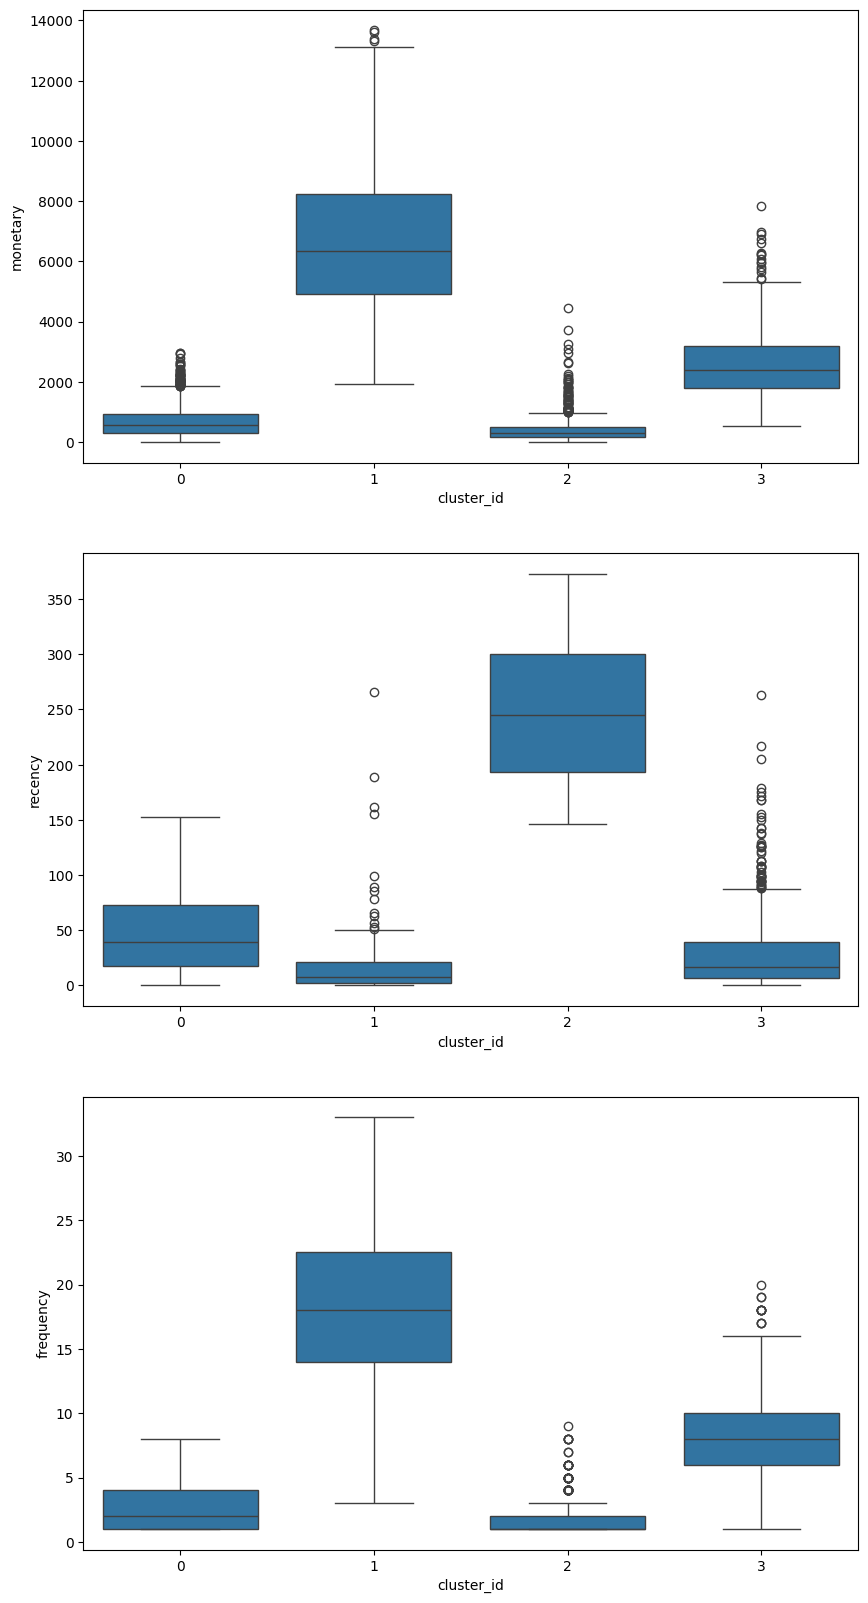

In [126]:
fig, ax = plt.subplots(3,1,figsize=(10,20))

sns.boxplot(x='cluster_id', y='monetary', data=rfm, ax=ax[0])
sns.boxplot(x='cluster_id', y='recency', data=rfm, ax=ax[1])
sns.boxplot(x='cluster_id', y='frequency', data=rfm, ax=ax[2])

### Pregunta 2: Hierarchical Clustering

In [127]:
# 3 clusters
inicio = time.time()
mergings = linkage(rfm_scaled, method="complete", metric='euclidean')
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

fin = time.time()
print(fin-inicio)

0.7014474868774414


In [128]:
# Assign cluster labels

rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,customerid,recency,frequency,monetary,cluster_id,Cluster_Labels
0,12347,1,7,4310.00,3,0
1,12348,74,4,1797.24,0,0
2,12349,18,1,1757.55,0,0
3,12350,309,1,334.40,2,0
4,12352,35,11,1545.41,3,0


<Axes: xlabel='Cluster_Labels', ylabel='monetary'>

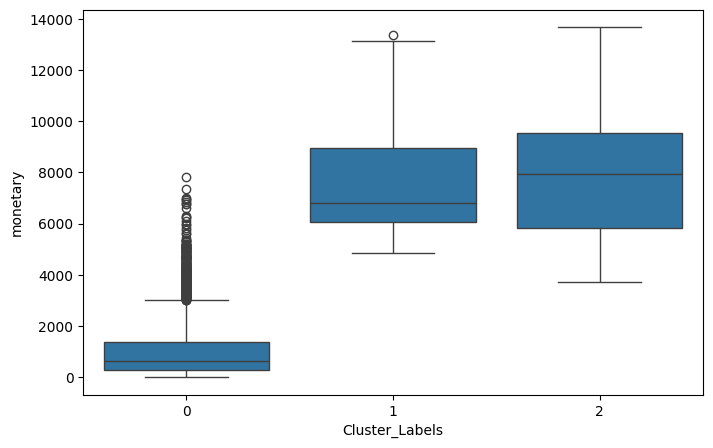

In [129]:
# Plot Cluster Id vs Monetary

sns.boxplot(x='Cluster_Labels', y='monetary', data=rfm)

<Axes: xlabel='Cluster_Labels', ylabel='frequency'>

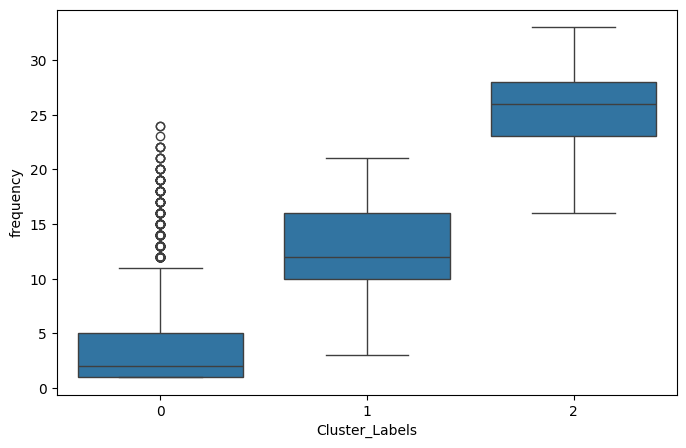

In [130]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='frequency', data=rfm)

<Axes: xlabel='Cluster_Labels', ylabel='recency'>

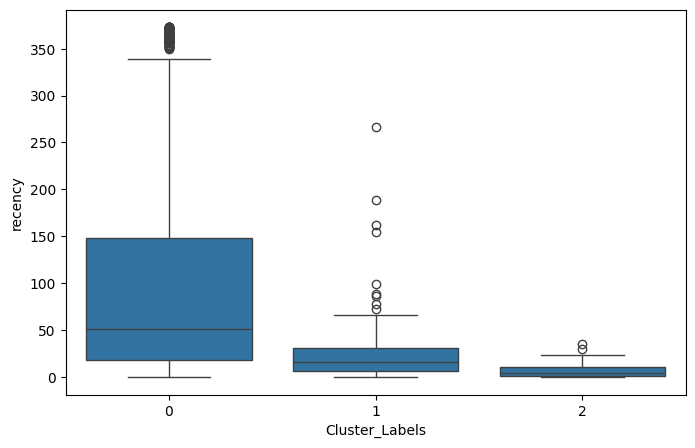

In [131]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='recency', data=rfm)

### 3.- Implementación DBSCAN

In [139]:
#Utilizamos el df original rfm antes del preprocesamiento
rfm2 = rfm[['recency','frequency','monetary']]

rfm2.head()

,recency,frequency,monetary
0,1,7,4310.00
1,74,4,1797.24
2,18,1,1757.55
3,309,1,334.40
4,35,11,1545.41


In [142]:
# Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(rfm2)
df_escalado = pd.DataFrame(df_escalado) 
df_escalado = df_escalado.rename(columns = {0: 'recency', 1: 'frequency',2:'monetary'})
df_escalado.head()

,recency,frequency,monetary
0,0.002681,0.18750,0.315114
1,0.198391,0.09375,0.131400
2,0.048257,0.00000,0.128499
3,0.828418,0.00000,0.024449
4,0.093834,0.31250,0.112988


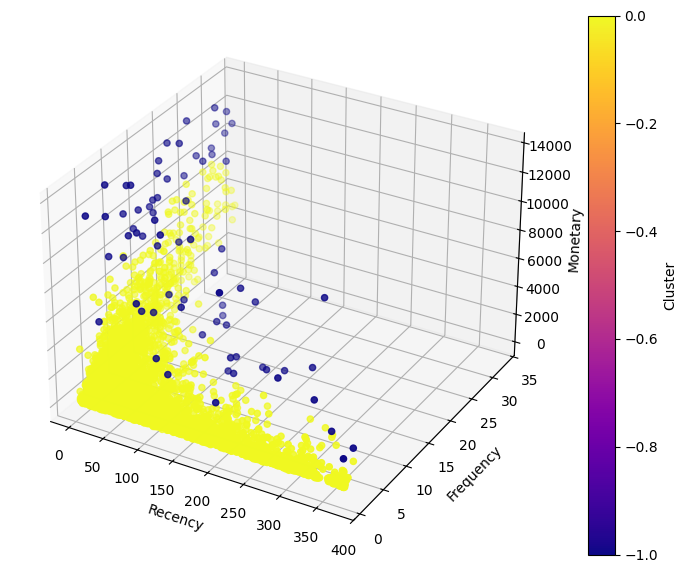

In [ ]:
# Ejecutamos primera vez DBSCAN
dbscan = DBSCAN(eps=0.08, min_samples=5, metric="euclidean").fit(df_escalado)
clusters = dbscan.fit_predict(df_escalado)

# Graficación de los clústers en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

df_values = rfm2.values 

# Usamos scatter para graficar los puntos
sc = ax.scatter(
    df_values[:, 0], 
    df_values[:, 1],  
    df_values[:, 2], 
    c=clusters,     
    cmap="plasma"
)

# Etiquetas de los ejes
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")

plt.colorbar(sc, label="Cluster")
plt.show()

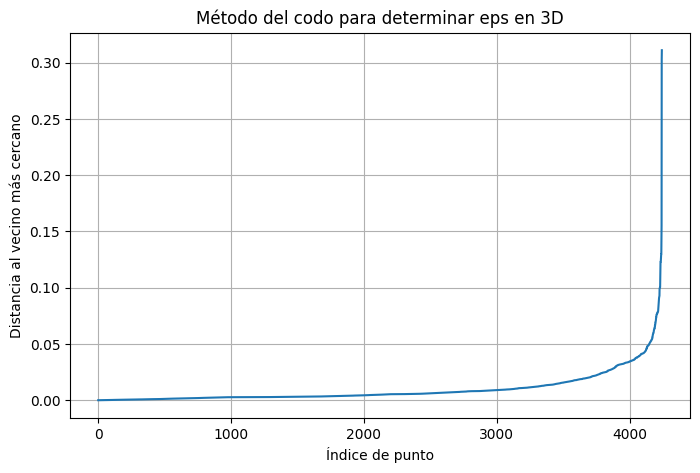

In [155]:
#Utilizamos método del codo

# Paso 1: Encontrar las distancias promedio al vecino más cercano
nearest_neighbors = NearestNeighbors(n_neighbors=2) 
nearest_neighbors.fit(df_escalado)
distances, _ = nearest_neighbors.kneighbors(df_escalado)

# Ordenar las distancias para identificar el codo
distances = np.sort(distances[:, 1])

# Paso 2: Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title("Método del codo para determinar eps en 3D")
plt.xlabel("Índice de punto")
plt.ylabel("Distancia al vecino más cercano")
plt.grid()
plt.show()

Según el método del codo podriamos tomar valores desde 0.08 hasta 0.15 que es el segmento donde crece exponencialmente, siendo 0.05 un valor con criterio más restrictivo y 0.15 un valor con criterio menos restrictivo

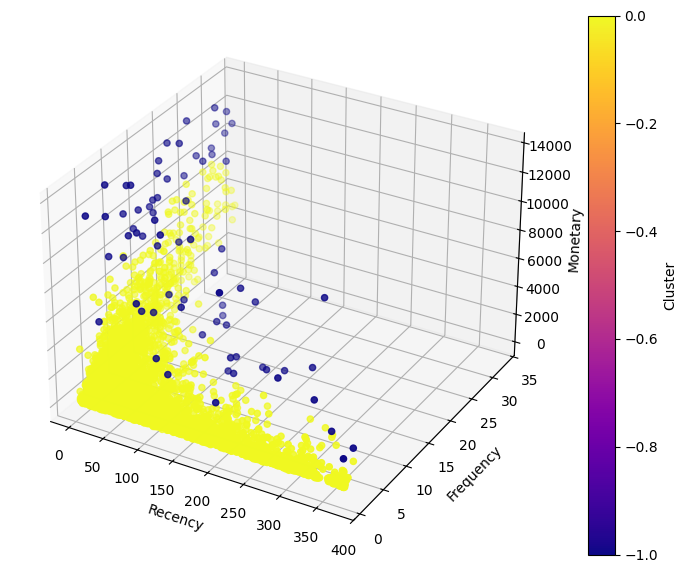

In [149]:
# Paso 3: Ajustar DBSCAN con el valor de eps obtenido visualmente
eps_optimo = 0.08  # Selecciona visualmente el codo del gráfico
dbscan = DBSCAN(eps=eps_optimo, min_samples=5, metric="euclidean").fit(df_escalado)

# Paso 4: Asignar los clusters y detectar outliers
clusters = dbscan.labels_

# Graficación de los clústers en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

df_values = rfm2.values 

#Volvemos a gráficar con el epsilon nuevo
sc = ax.scatter(
    df_values[:, 0], 
    df_values[:, 1],  
    df_values[:, 2],  
    c=clusters,      
    cmap="plasma"
)

# Etiquetas de los ejes
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.colorbar(sc, label="Cluster")
plt.show()

In [150]:
# Identificar outliers
outliers = df_values[clusters == -1]
print("Número de outliers detectados:", len(outliers))

Número de outliers detectados: 74
